In [0]:
# Cargar con Spark
df_spark = spark.read.option("header", True).csv("/Volumes/workspace/default/base_datos_fraude/ProductPipelineUSA.csv")

# Convertir a pandas (solo si el dataset no es muy grande)
df = df_spark.toPandas()

In [0]:
from pyspark.sql.functions import col

# Convertir columnas problemáticas a string
df_spark = df_spark.withColumn("Account", col("Account").cast("string")) \
                   .withColumn("Owner", col("Owner").cast("string"))

# Ahora convertir a pandas
df = df_spark.toPandas()
display(df.head())

Account,Owner,City,State,Product,Product Family,Stage,Pipeline Amount,Source,Contract Amount,Stage Date/Close Date,Close Month,Close Quarter
Christiansen LLC,D. Ellington,Dallas,TX,Laptop-17,Laptop,2-Needs Analysis,8386,Referral,null,4/7/16,4,2
Christiansen LLC,D. Ellington,Dallas,TX,Laptop-17,Laptop,2-Needs Analysis,104729,Referral,null,3/3/16,3,1
Gleason LLC,J. Coltrane,Salt Lake City,UT,Laptop-13,Laptop,2-Needs Analysis,198843,Referral,null,6/19/16,6,2
Dooley Group,J. Coltrane,Chicago,IL,Laptop-17,Laptop,2-Needs Analysis,444960,Web,null,3/25/16,3,1
Gleason LLC,J. Coltrane,Washington,DC,Laptop-17,Laptop,2-Needs Analysis,360883,Partner,null,4/13/16,4,2


In [0]:
from pyspark.sql.functions import col

# Convertir columnas numéricas que están como object a float
numerical_cols = ["Pipeline Amount", "Contract Amount"]

for c in numerical_cols:
    df_spark = df_spark.withColumn(c, col(c).cast("float"))

# Verificar tipos
df_spark.printSchema()

root
 |-- Account: string (nullable = true)
 |-- Owner: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Product Family: string (nullable = true)
 |-- Stage: string (nullable = true)
 |-- Pipeline Amount: float (nullable = true)
 |-- Source: string (nullable = true)
 |-- Contract Amount: float (nullable = true)
 |-- Stage Date/Close Date: string (nullable = true)
 |-- Close Month: string (nullable = true)
 |-- Close Quarter: string (nullable = true)



In [0]:
# Reemplazar nulos con 0 o el promedio (según tu análisis)
df_spark = df_spark.fillna({"Contract Amount": 0, "Pipeline Amount": 0})

In [0]:
# Columnas que necesitamos para análisis (numéricas + categóricas básicas)
cols_for_pandas = ["Stage", "Product", "Owner", "Pipeline Amount", "Contract Amount"]
df = df_spark.select(*cols_for_pandas).toPandas()

# Revisar primeras filas
display(df.head())

Stage,Product,Owner,Pipeline Amount,Contract Amount
2-Needs Analysis,Laptop-17,D. Ellington,8386.0,0.0
2-Needs Analysis,Laptop-17,D. Ellington,104729.0,0.0
2-Needs Analysis,Laptop-13,J. Coltrane,198843.0,0.0
2-Needs Analysis,Laptop-17,J. Coltrane,444960.0,0.0
2-Needs Analysis,Laptop-17,J. Coltrane,360883.0,0.0


In [0]:
# Número de filas y columnas
print(f"📌 Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Columnas del dataset
print(f"📌 Columnas: {df.columns.tolist()}")

# Tipos de datos
print("\n📌 Tipos de datos:")
print(df.dtypes)

# Valores nulos por columna
print("\n📌 Valores nulos por columna:")
display(df.isnull().sum())

# Estadísticas descriptivas de las variables numéricas
print("\n📌 Estadísticas descriptivas:")
display(df.describe())

📌 Filas: 1000, Columnas: 5
📌 Columnas: ['Stage', 'Product', 'Owner', 'Pipeline Amount', 'Contract Amount']

📌 Tipos de datos:
Stage               object
Product             object
Owner               object
Pipeline Amount    float32
Contract Amount    float32
dtype: object

📌 Valores nulos por columna:


Stage              0
Product            0
Owner              0
Pipeline Amount    0
Contract Amount    0
dtype: int64


📌 Estadísticas descriptivas:


Pipeline Amount,Contract Amount
1000.0,1000.0
220820.859375,8868.9638671875
184990.703125,53308.2578125
-497764.0,0.0
102143.0,0.0
230141.5,0.0
367012.5,0.0
498807.0,467895.0


In [0]:
# Número de filas y columnas
print(f"📌 Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Columnas del dataset
print(f"📌 Columnas: {df.columns.tolist()}")

# Distribución de la variable 'Stage' (etapa de la oportunidad)
print("\n📌 Distribución de etapas de oportunidades:")
display(df['Stage'].value_counts())

# Revisar si hay valores nulos
print("\n📌 Valores nulos por columna:")
display(df.isnull().sum())


In [0]:
# Widget para filtrar por Owner
dbutils.widgets.text("Owner", "All", "Filtrar por Owner")

# Obtener valor del widget
owner_filter = dbutils.widgets.get("Owner")

# Filtrar dataframe según widget
if owner_filter != "All":
    df_dashboard = df[df['Owner'] == owner_filter]
else:
    df_dashboard = df.copy()

In [0]:
# Total de oportunidades
total_opps = df_dashboard.shape[0]

# Monto total de Pipeline y Contract
total_pipeline = df_dashboard["Pipeline Amount"].sum()
total_contract = df_dashboard["Contract Amount"].sum()

# Promedio de Pipeline y Contract
avg_pipeline = df_dashboard["Pipeline Amount"].mean()
avg_contract = df_dashboard["Contract Amount"].mean()

print(f"📌 Total oportunidades: {total_opps}")
print(f"📌 Monto total Pipeline: ${total_pipeline:,.2f}")
print(f"📌 Monto total Contract: ${total_contract:,.2f}")
print(f"📌 Promedio Pipeline: ${avg_pipeline:,.2f}")
print(f"📌 Promedio Contract: ${avg_contract:,.2f}")

📌 Total oportunidades: 1000
📌 Monto total Pipeline: $220,820,864.00
📌 Monto total Contract: $8,868,964.00
📌 Promedio Pipeline: $220,820.86
📌 Promedio Contract: $8,868.96


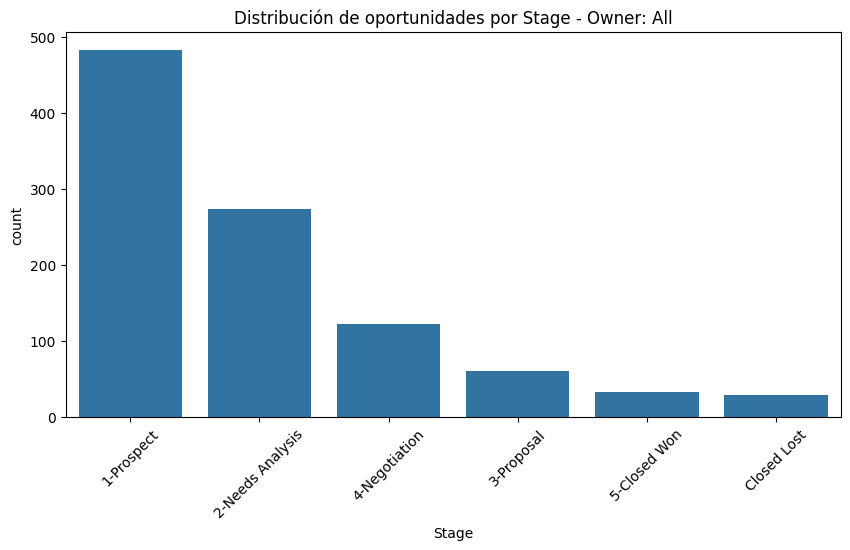

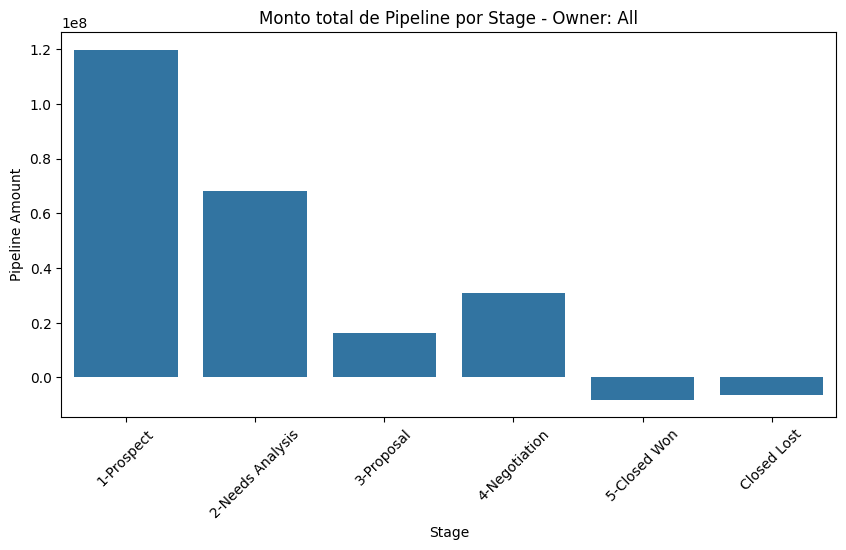

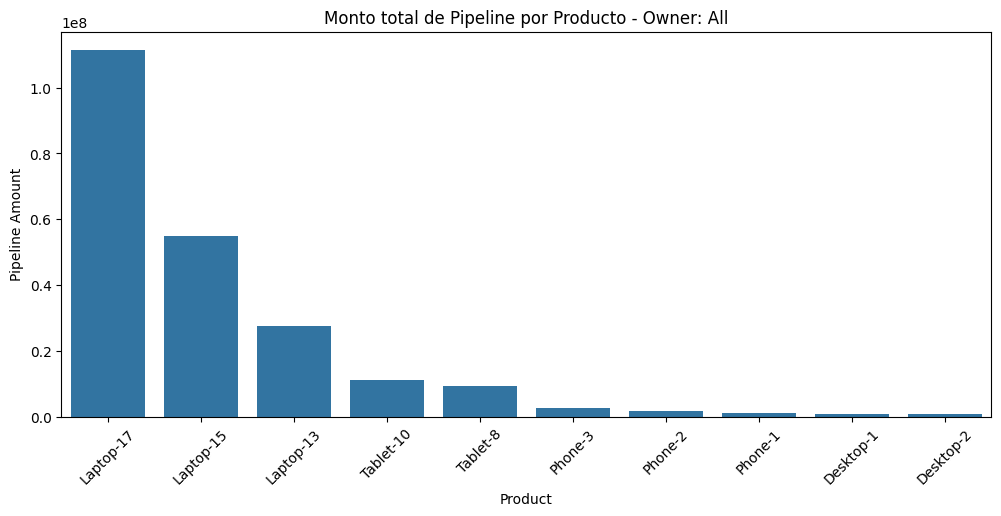

In [0]:
# Import seaborn y matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de oportunidades por Stage
plt.figure(figsize=(10,5))
sns.countplot(data=df_dashboard, x='Stage', order=df_dashboard['Stage'].value_counts().index)
plt.title(f'Distribución de oportunidades por Stage - Owner: {owner_filter}')
plt.xticks(rotation=45)
plt.show()

# Monto total por Stage
plt.figure(figsize=(10,5))
sns.barplot(data=df_dashboard.groupby('Stage')["Pipeline Amount"].sum().reset_index(), x='Stage', y='Pipeline Amount')
plt.title(f'Monto total de Pipeline por Stage - Owner: {owner_filter}')
plt.xticks(rotation=45)
plt.show()

# Monto total por Producto
plt.figure(figsize=(12,5))
sns.barplot(data=df_dashboard.groupby('Product')["Pipeline Amount"].sum().reset_index().sort_values("Pipeline Amount", ascending=False),
            x='Product', y='Pipeline Amount')
plt.title(f'Monto total de Pipeline por Producto - Owner: {owner_filter}')
plt.xticks(rotation=45)
plt.show()